Hi Jurek,\
\
My plan for this weekend was the following:\
First of all, I was thinking about looking at how many shells of the star would fly away when it enters the tidal radius.
The problem for this was that no shells are over at this point. They should all be gone because the gravitation of the bh is way stronger.\
Maybe I interpret this wrong but when I was looking at how the bh acts on the different parts of the star (last cell in this notebook), they do not have exactly the same orbit but they do stay in eachothers neighborhood. So I think the particles go there own way, way before the tidal radius. I am really not sure about this so I wanted to ask what you think?\
I am a little stuck at this part but my plan for tomorrow is to devide the star into different particles as soon as they enter the tidal radius and code this part eventho the part before is not quite what I thought.\

In [1]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import animation
from scipy import constants

In [2]:

G = constants.G
c = constants.speed_of_light

m = 1.989 * 10**30              # mass of the sun in kg
M = 10**6 * m                   # mass of BH

r_star = 696340*10**3


In [3]:
"Initial conditions"

x0 =float(0)
y0 =float(8*10**9)     # close to the isco radius
v_x0 =  10**8
v_y0 =  0


In [4]:
def gravitation_star(n_shells):
    r_star = 696340*10**3
    grav_star=[]
    rad_star=[]
    for i in range(n_shells-1):
        r=r_star*(n_shells-i)/n_shells
        rad_star.append(r)
        mass=(n_shells-i-1)/n_shells
        F_star=(G*(m/n_shells)*mass/n_shells)/(r**2)
        grav_star.append(F_star)
    return grav_star,rad_star
grav_star,rad_star=gravitation_star(10)


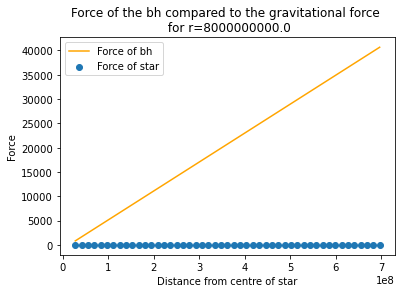

In [5]:
def gravitation_bh(r_bh,n_shells):
    r_star = 696340*10**3
    grav_bh=[]
    for i in range(n_shells-1):
        r=r_star*(n_shells-i)/n_shells
        mass=(n_shells-i-1)/n_shells
        F_bh=(G*M*(mass/n_shells))/(r_bh**2)
        grav_bh.append(F_bh)
    return grav_bh
F_bh=gravitation_bh(np.sqrt(x0**2+y0**2),50)
F_star,rad_star=gravitation_star(50)

plt.scatter(rad_star,F_star,label="Force of star")
plt.plot(rad_star,F_bh,color='orange',label="Force of bh")
plt.xlabel("Distance from centre of star")
plt.ylabel("Force")
plt.title("Force of the bh compared to the gravitational force \n for r={}".format(np.sqrt(x0**2+y0**2)))
plt.legend()
plt.show()

x=0.0,y=8000000000.0
The angular momentum is 1.5912e+48
vy_0 is  50.0 % of the speed of light.


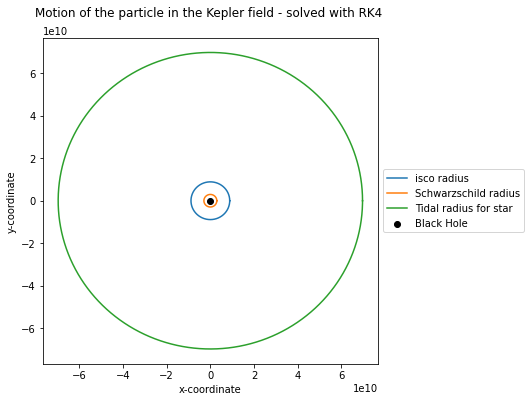

In [6]:
A = G*M

# rk4 only works for 1st order DE
r_ss   = 2*A/c**2
r_isco = 3*r_ss


x0 =float(0)
y0 =float(8*10**9)     # close to the isco radius
v_x0 =  10**8
v_y0 =  0


def L(x,y, m):
    '''
    function that calculates the angular momentum for given x, y
    L is constant over time
    Since at point t = 0, we have only a velocity component in x-direction, so we calculate the L(0) = L(t) to be:
    '''
    print("x={},y={}".format(x,y))
    x = float(x)
    y = float(y)
    r = np.sqrt((x**2+y**2))
    return r*m*v_x0

L = L(x0, y0, m)
print("The angular momentum is",L)

A = G*M
B = L**2 / m**2             # 0.005
C = 3*G*M*L**2 / (m*c**2)   # 0.8


# things for the Black hole

r_ss   = 2*A/c**2
r_isco = 3*r_ss


x0 =    2*r_ss
y0 =    2*r_ss

v_y0 =  0
# orbit velo
v_x0 = np.sqrt(A/y0)

print('vy_0 is ', v_x0/c*100, '% of the speed of light.')


# stable orbit for photons
r_photon = 1.5 * r_ss

# tidal radius
r_tidal = r_star * (M/m)**(1/3)



def cartesian(r):
    theta=np.linspace(0,2*np.pi,1000)
    x=r*(np.cos(theta))
    y=r*(np.sin(theta))
    return x,y

x_ss,y_ss=cartesian(r_ss)
x_isco,y_isco=cartesian(r_isco)
x_tidal,y_tidal=cartesian(r_tidal)

plt.figure(figsize=(6, 6))
plt.scatter(0,0, label= 'Black Hole', color = 'black')#, s = 300)
plt.plot(x_isco,y_isco, label = 'isco radius')
plt.plot(x_ss,y_ss, label = 'Schwarzschild radius')
plt.plot(x_tidal,y_tidal, label = 'Tidal radius for star')
plt.title('Motion of the particle in the Kepler field - solved with RK4 \n')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel("x-coordinate")
plt.ylabel("y-coordinate")


plt.show()


#                               Kepler orbit or BH orbit? 
Set to True for Newtonian potential, False for BH potential, which does not seem to work at all and to 2 for the alternative potential from the paper. Small radii and high velocities are the most interesting region for us.
For the kepler potential we see that we still have an orbit for r<r_isco
That makes total sense, there is no isco for keplerian potential.
The following values give reasonable results for the keplerian potential:\
\
m = 1.989  10^30        (mass of the sun in kg)\
M = 10^6 m         (mass of BH)\
\
r_star = 1 \
\
A = G*M\
\
\
We're gonna use kepler = 2 potential as soon as r<r_isco the orbits become unstable\
\
x0 =    8*10**9\
y0 =    8*10**9     (close to the isco radius)\
v_x0 =  10**8\
v_y0 =  0\
v_x0=0\
orbit velo\
v_x0 = np.sqrt(G*M/y0)\
\
orbit velo for BH\
it actually works...\
v_x0 = np.sqrt(G*M/y0 + 3*G**2*M**2/(y0**2*c**2))\

escape velo, A = G*M\
we see that for 70% e.g. the particle falls back into the Mass\
v_x0 = 0\
v_y0 = np.sqrt(A*2/y0)*0.7\

In [7]:

kepler = 2              



# escape velocity for newtonian potential
# v0 = np.sqrt(2/r0) 

t = np.linspace(0,200000,20000)

t0 = t[0]

h = len(t)

# as proposed in the paper: 
# https://arxiv.org/pdf/2008.04922.pdf

def v_x_(t,x,y,v_x,v_y):
    r = np.sqrt((x**2+y**2))
    if kepler == True:
        return -A*x / r**3 #+ B*x / r**4 - C*x / r**5
    elif kepler == 2:
        return -A*x / r**3 - 3*(G*M/c)**2*x / r**4
    else:
        return -A*x / r**3 + B*x / r**4 - C*x / r**5

def v_y_(t,x,y,v_x,v_y):
    r = np.sqrt((x**2+y**2))
    if kepler == True:
        return -A*y / r**3 #+ B*y / r**4 - C*y / r**5
    elif kepler == 2:
        return -A*y / r**3 - 3*(G*M/c)**2*y / r**4
    else: 
        return -A*y / r**3 + B*y / r**4 - C*y / r**5
# this acts as v = dot(x) and v = dot(y)
def x_(t,x,y,v_x,v_y):
    return v_x

def y_(t,x,y,v_x,v_y):
    return v_y

x0= -139267999999.99997
y0= 69634099999.99998
Number of shells that flies away at r_tidal: 4
The total of shells was  4


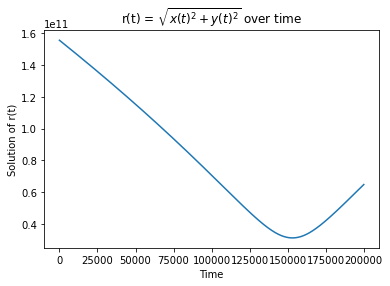

In [8]:
def my_rk4(x0,y0,v_x0,v_y0,h =0.2):
    '''
    This function solves the differential equations (the equation of motion)
    for the x- and y-component of a particle. At each step, we evaluate v[i] for x and y which corresponds to their derivatives 
    as well as the derivatives dot(v) for x and y which corresponds to their second order derivatives. 
    Since for the (i+1)-th step, we need the values of x, y, v_x and v_y for the i-th step, for each step we calculate these 4 values
    '''
    x = np.zeros(len(t))
    v_x = np.zeros(len(t))
    y = np.zeros(len(t))
    v_y = np.zeros(len(t))
    F_star,rad_star=gravitation_star(5)
    n=0
    shell_fly_away=[]
    x[0] = x0
    print("x0=",x0)
    v_x[0] = v_x0
    y[0] = y0
    print("y0=",y0)
    v_y[0] = v_y0
    for i in range(0,len(t)-1):
        k1x =   (x_(    t[i], x[i], y[i], v_x[i], v_y[i]))
        k1v_x = (v_x_(  t[i], x[i], y[i], v_x[i], v_y[i]))
        k1y =   (y_(    t[i], x[i], y[i], v_x[i], v_y[i]))
        k1v_y = (v_y_(  t[i], x[i], y[i], v_x[i], v_y[i]))

        k2x =   (x_(    t[i]+ h/2, x[i]+ h*k1x/2, y[i]+ h*k1y/2, v_x[i]+ h*k1v_x/2, v_y[i]+ h*k1v_y/2))
        k2v_x = (v_x_(  t[i]+ h/2, x[i]+ h*k1x/2, y[i]+ h*k1y/2, v_x[i]+ h*k1v_x/2, v_y[i]+ h*k1v_y/2))
        k2y =   (y_(    t[i]+ h/2, x[i]+ h*k1x/2, y[i]+ h*k1y/2, v_x[i]+ h*k1v_x/2, v_y[i]+ h*k1v_y/2))
        k2v_y = (v_y_(  t[i]+ h/2, x[i]+ h*k1x/2, y[i]+ h*k1y/2, v_x[i]+ h*k1v_x/2, v_y[i]+ h*k1v_y/2))

        k3x =   (x_(    t[i]+ h/2, x[i]+ h*k2x/2, y[i]+ h*k2y/2, v_x[i]+ h*k2v_x/2, v_y[i]+ h*k2v_y/2))
        k3v_x = (v_x_(  t[i]+ h/2, x[i]+ h*k2x/2, y[i]+ h*k2y/2, v_x[i]+ h*k2v_x/2, v_y[i]+ h*k2v_y/2))
        k3y =   (y_(    t[i]+ h/2, x[i]+ h*k2x/2, y[i]+ h*k2y/2, v_x[i]+ h*k2v_x/2, v_y[i]+ h*k2v_y/2))
        k3v_y = (v_y_(  t[i]+ h/2, x[i]+ h*k2x/2, y[i]+ h*k2y/2, v_x[i]+ h*k2v_x/2, v_y[i]+ h*k2v_y/2))
        
        k4x =   (x_(    t[i]+ h, x[i]+ h*k3x/2, y[i]+ h*k3y/2, v_x[i]+ h*k3v_x/2, v_y[i]+ h*k3v_y/2))
        k4v_x = (v_x_(  t[i]+ h, x[i]+ h*k3x/2, y[i]+ h*k3y/2, v_x[i]+ h*k3v_x/2, v_y[i]+ h*k3v_y/2))
        k4y =   (y_(    t[i]+ h, x[i]+ h*k3x/2, y[i]+ h*k3y/2, v_x[i]+ h*k3v_x/2, v_y[i]+ h*k3v_y/2))
        k4v_y = (v_y_(  t[i]+ h, x[i]+ h*k3x/2, y[i]+ h*k3y/2, v_x[i]+ h*k3v_x/2, v_y[i]+ h*k3v_y/2))

        x[i+1]  = x[i] + (k1x+2*k2x+2*k3x+k4x)*h/6
        v_x[i+1]  = v_x[i] + (k1v_x+2*k2v_x+2*k3v_x+k4v_x)*h/6
        y[i+1]  = y[i] + (k1y+2*k2y+2*k3y+k4y)*h/6
        v_y[i+1]  = v_y[i] + (k1v_y+2*k2v_y+2*k3v_y+k4v_y)*h/6


        # define black hole radius to be one right now ---------> I put r_ss here, and not the radius of the bh, because no particle can escape after this point
        if np.sqrt(x[i]**2+y[i]**2) <= r_ss:    
            x[i] = 0
            y[i] = 0
            x = x[:i]
            y = y[:i]
            v_x = v_x[:i]
            v_y = v_y[:i]
            break
        F_bh=gravitation_bh(np.sqrt(x[i]**2+y[i]**2),5)

        if (np.sqrt(x[i]**2+y[i]**2))<r_tidal and (np.sqrt(x[i-1]**2+y[i-1]**2))>r_tidal:
            fly_away=[]
            for k in range(len(F_star)):
                if abs(F_bh[k])>abs(F_star[k]):
                    fly_away.append(rad_star[k])
            print("Number of shells that flies away at r_tidal:",len(fly_away))
            print("The total of shells was ",len(F_star))
        
        if abs(F_bh[n])>abs(F_star[n]) and n<(len(F_star)-1):
            shell_fly_away.append(rad_star[n])
            n+=1
    F_star=F_star[n::]
    return x, y, v_x, v_y,F_star,F_bh


# v_res, r_res = rk4()
# print(np.shape(v_res), np.shape(r_res))
x0 =-1*float(r_tidal*2)
y0 =float(r_tidal+100000)     # close to the isco radius
v_x0 =  9**8
v_y0 =  0
my_x, my_y, my_v_x, my_v_y,F_star,F_bh = my_rk4(x0,y0,v_x0,v_y0)
my_r = np.sqrt(my_x**2+ my_y**2)
my_v = np.sqrt(my_v_x**2+ my_v_y**2)
plt.figure()
plt.plot(t[:len(my_x)], my_r) 
plt.xlabel('Time')
plt.ylabel('Solution of r(t)')
plt.title('r(t) = $\sqrt{x(t)^2+y(t)^2}$ over time')
plt.show()



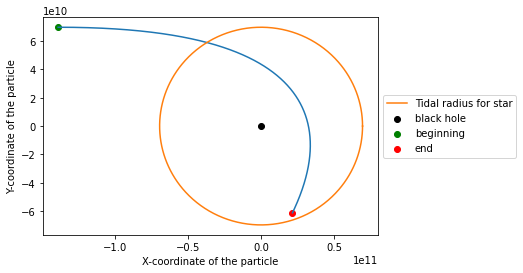

In [9]:
plt.figure()
plt.plot(my_x, my_y)
plt.plot(x_tidal,y_tidal, label = 'Tidal radius for star')
plt.xlabel('X-coordinate of the particle')
plt.ylabel('Y-coordinate of the particle')
plt.scatter(0,0,color='black',marker='o',label="black hole")
plt.scatter(my_x[0], my_y[0],color="green",label = 'beginning')
plt.scatter(my_x[-1], my_y[-1],color="red", label = 'end')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

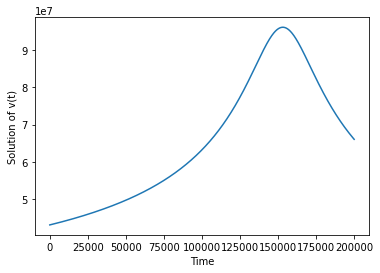

In [10]:
plt.figure()
plt.plot(t[:len(my_r)], my_v)
plt.xlabel('Time')
plt.ylabel('Solution of v(t)')
plt.show()

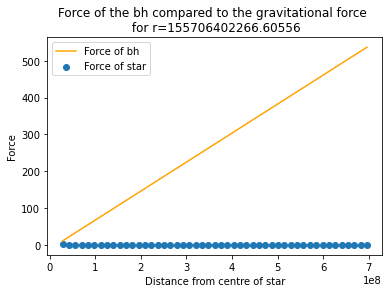

In [11]:
F_star,rad_star=gravitation_star(50)
F_bh=gravitation_bh(r_tidal,50)
x=np.linspace(1,50,49)
plt.scatter(rad_star,F_star,label="Force of star")
plt.plot(rad_star,F_bh,color='orange',label="Force of bh")
plt.xlabel("Distance from centre of star")
plt.ylabel("Force")
plt.title("Force of the bh compared to the gravitational force \n for r={}".format(my_r[0]))
plt.legend()
plt.show()

x0= 8166039665.166216
y0= 69634099999.99998
Number of shells that flies away at r_tidal: 4
The total of shells was  4
x0= 8862379665.166216
y0= 69634099999.99998
Number of shells that flies away at r_tidal: 4
The total of shells was  4
x0= 9558719665.166216
y0= 69634099999.99998
Number of shells that flies away at r_tidal: 4
The total of shells was  4


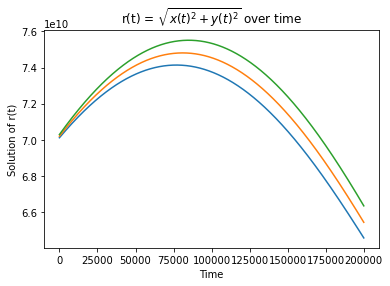

In [12]:
x0 =r_isco
x0s=[x0-r_star,x0,x0+r_star]
y0 =float(r_tidal+100000)     # close to the isco radius
v_x0 =  9**8
v_y0 =  0
for i in range(3):
    my_x, my_y, my_v_x, my_v_y,F_star,F_bh = my_rk4(x0s[i],y0,v_x0,v_y0)
    #plt.plot(my_x,my_y)
    my_r = np.sqrt(my_x**2+ my_y**2)
    plt.plot(t[:len(my_x)], my_r) 
plt.xlabel('Time')
plt.ylabel('Solution of r(t)')
plt.title('r(t) = $\sqrt{x(t)^2+y(t)^2}$ over time')
plt.show()
plt.show()